In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-beta0'

In [3]:
 dataset = pd.read_csv('AirPassengers.csv')

In [4]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dataset.index

RangeIndex(start=0, stop=144, step=1)

In [6]:
dataset.plot()

In [7]:
import matplotlib.pyplot as plt

In [8]:
dataset.set_index(keys=['Month'], drop=True, inplace=True)

In [9]:
dataset.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [10]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
dataset = ms.fit_transform(dataset.values)

/home/r2learn/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [12]:
train_size = int(len(dataset) * 0.7)

In [13]:
train_data = dataset[:train_size]
test_data = dataset[train_size:]

In [14]:
import numpy as np
import math

In [15]:
np.random.seed(7)

In [16]:
def creat_data(dataset, back):
    return dataset[0:len(dataset)-back], dataset[back:]

In [17]:
train_X, train_y = creat_data(train_data, 1)
val_X, val_y = creat_data(test_data, 1)

In [18]:
train_X = train_X[:,:, np.newaxis]

In [33]:
val_X = val_X[:,:, np.newaxis]

In [45]:
# build LSTM model
model = tf.keras.models.Sequential()

In [46]:
#model.add(tf.keras.layers.Dense(5, input_shape=[4, ], activation='relu'))

In [47]:
model.add(tf.keras.layers.LSTM(4, input_shape=[1, 1]))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [49]:
import datetime

In [50]:
model.add(tf.keras.layers.Dense(1, activation='relu'))

In [51]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
logdir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [53]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
model.fit(x=train_X, y=train_y, epochs=40, batch_size=1, callbacks=[tesorboard_callback])

Train on 99 samples
Epoch 1/40
99/99 [==============================] - 0s 5ms/sample - loss: 0.0399
Epoch 2/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0188
Epoch 3/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0147
Epoch 4/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0135
Epoch 5/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0125
Epoch 6/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0115
Epoch 7/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0103
Epoch 8/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0093
Epoch 9/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0084
Epoch 10/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0073
Epoch 11/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0063
Epoch 12/40
99/99 [==============================] - 0s 2ms/sample - loss: 0.0055
Epoch

In [55]:
train_predict = model.predict(train_X)

In [56]:
test_predict = model.predict(val_X)

In [57]:
train_predict.shape

(99, 1)

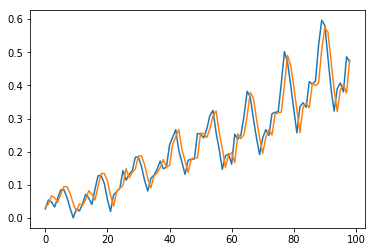

In [58]:
plt.plot(train_y.flatten())
plt.plot(train_predict.flatten())

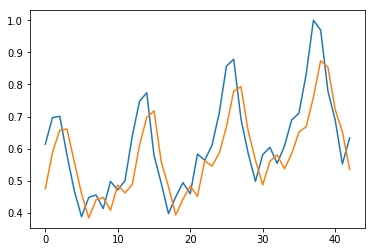

In [60]:
plt.plot(val_y.flatten())
plt.plot(test_predict.flatten())

In [61]:
train_predict = ms.inverse_transform(train_predict)
val_predict = ms.inverse_transform(test_predict)

In [67]:
train_y = ms.inverse_transform(train_y)
val_y = ms.inverse_transform(val_y)

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(train_predict, train_y)

537.34875781094

In [70]:
mean_squared_error(val_y, val_predict)

2526.8973509747925

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(train_predict, train_y)

0.8878285764193897

In [73]:
r2_score(val_predict, val_y)

0.3701525833751428

In [85]:
train_data = np.vstack((train_y, val_y)).flatten()

In [86]:
predict = np.vstack((train_predict, val_predict)).flatten()

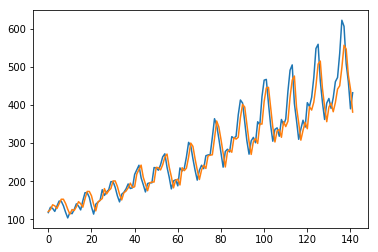

In [87]:
plt.plot(train_data)
plt.plot(predict)